# Thalamus project summary

- 계산에 필요한 library들 load


In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import os
import re
from scipy import stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
# rpy2's mapping of R's ggplot2
from rpy2.robjects.lib import ggplot2
# goodies for ipython (here to plot ggplot2
# in the notebook)
from rpy2.interactive import ipython
import scipy

pd.set_option('display.max_rows',5000)
pd.set_option('display.max_columns',5000)

%load_ext rmagic

%R require(ggplot2)
%R require(ppcor)
%R require(car)
%R require(multcomp)
%R require(effects)


ImportError: No module named rpy2.robjects.lib

#Data load

In [2]:
allData=pd.read_csv("/Users/admin/Dropbox/CHRvsNOR/2014_stats/37_38_22_thr10/LR_averaged_thalData.csv",sep='\t')

IOError: File /Users/admin/Dropbox/CHRvsNOR/2014_stats/37_38_22_thr10/LR_averaged_thalData.csv does not exist

In [3]:
allData.columns=[u'subject', u'group', u'cortex', u'intracranialVolume', u'cortexVolume', u'relativeConnectivity', u'segmentVolume', u'thalamusVolume', u'totalConnectivity', u'sex', u'age', u'bday', u'education', u'hand', u'IQ', u'P1', u'P2', u'P3', u'P4', u'P5', u'P6', u'P7', u'N1', u'N2', u'N3', u'N4', u'N5', u'N6', u'N7', u'G1', u'G2', u'G3', u'G4', u'G5', u'G6', u'G7', u'G8', u'G9', u'G10', u'G11', u'G12', u'G13', u'G14', u'G15', u'G16', u'PSP10', u'PSP20', u'PSP30', u'PSP40', u'PSP50', u'PSN10', u'PSN20', u'PSN30', u'PSN40', u'PSN50', u'PSN60', u'PSD10', u'PSD20', u'PSD30', u'PSD40', u'PSG10', u'PSG20', u'PSG30', u'PSG40', u'PSPTOT0', u'PSNTOT0', u'PSDTOT0', u'PSGTOT0', u'SIPSTOT0', u'AS1_10', u'AS1_20', u'AS1_30', u'AS1_40', u'AS2_10', u'AS2_20', u'AS3_10', u'AS3_20', u'AS3_30', u'AS4_10', u'AS4_20', u'AS4_30', u'AS5_10', u'AS5_20', u'AS5_30', u'AS5_40', u'AS6_10', u'AS6_20', u'AS6_30', u'AS6_40', u'AS7_10', u'AS7_20', u'AS7_30', u'AS7_40', u'AS7_50', u'AS7_60', u'AS7_70', u'AS7_80', u'AS1TOT0', u'AS2TOT0', u'AS3TOT0', u'AS4TOT0', u'AS5TOT0', u'AS6TOT0', u'AS7TOT0', u'CAARMSTOT0', u'SAPS_ghksrkr0', u'SAPS_akdtkd0', u'SAPS_rhldlgksgodehd0', u'SAPS_didtjdwjrtkrh0', u'SAPStot0', u'SANS_wjdehdensak0', u'SANS_akfdjqtdma0', u'SANS_andmldyr0', u'SANS_anzhorka0', u'SANS_wndmlfur0', u'SANStot0', u'GAF', u'GAFpastyr0', u'GAFpremorbid0', u'SOFASpresent0', u'SOFASpastyr0', u'SOFASpremorbid0', u'HAMA0', u'HAMD', u'YMS', u'BPRS0', u'parentalSES', u'panssTot', u'pTot', u'nTot', u'gTot']

###data example

In [4]:
allData.head(10)

,subject,group,cortex,intracranialVolume,cortexVolume,relativeConnectivity,segmentVolume,thalamusVolume,totalConnectivity,sex,age,bday,education,hand,IQ,P1,P2,P3,P4,P5,P6,P7,N1,N2,N3,N4,N5,N6,N7,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,PSP10,PSP20,PSP30,PSP40,PSP50,PSN10,PSN20,PSN30,PSN40,PSN50,PSN60,PSD10,PSD20,PSD30,PSD40,PSG10,PSG20,PSG30,PSG40,PSPTOT0,PSNTOT0,PSDTOT0,PSGTOT0,SIPSTOT0,AS1_10,AS1_20,AS1_30,AS1_40,AS2_10,AS2_20,AS3_10,AS3_20,AS3_30,AS4_10,AS4_20,AS4_30,AS5_10,AS5_20,AS5_30,AS5_40,AS6_10,AS6_20,AS6_30,AS6_40,AS7_10,AS7_20,AS7_30,AS7_40,AS7_50,AS7_60,AS7_70,AS7_80,AS1TOT0,AS2TOT0,AS3TOT0,AS4TOT0,AS5TOT0,AS6TOT0,AS7TOT0,CAARMSTOT0,SAPS_ghksrkr0,SAPS_akdtkd0,SAPS_rhldlgksgodehd0,SAPS_didtjdwjrtkrh0,SAPStot0,SANS_wjdehdensak0,SANS_akfdjqtdma0,SANS_andmldyr0,SANS_anzhorka0,SANS_wndmlfur0,SANStot0,GAF,GAFpastyr0,GAFpremorbid0,SOFASpresent0,SOFASpastyr0,SOFASpremorbid0,HAMA0,HAMD,YMS,BPRS0,parentalSES,panssTot,pTot,nTot,gTot
0,CHR02_JHJ,CHR,LPFC,1537718.750,29731.5,0.111119,1282.5,9013,2235991.499760,1,18,33331,12,1,118,2,3,2,4,1,3,4,2,4,2,4,2,2,2,1,5,5,3,1,6,3,2,2,1,3,3,3,4,3,4,1,4,0,3,4,4,3,3,5,4,3,1,2,4,1,3,5,2,5,0,0,0,0,0,1,4,3,3,4,3,4,2,0,5,3,4,3,3,2,4,3,2,2,3,0,5,3,1,5,1,0,5,0,0,0,0,0,0,0,0,5,5,7,11,0,4,7,8,13,5,0,38,54,81,45,45,75,23,22,2,59,2,86,19,18,49
1,CHR02_JHJ,CHR,LTC,1537718.750,43397.5,0.071589,1130.5,9013,1425387.500190,1,18,33331,12,1,118,2,3,2,4,1,3,4,2,4,2,4,2,2,2,1,5,5,3,1,6,3,2,2,1,3,3,3,4,3,4,1,4,0,3,4,4,3,3,5,4,3,1,2,4,1,3,5,2,5,0,0,0,0,0,1,4,3,3,4,3,4,2,0,5,3,4,3,3,2,4,3,2,2,3,0,5,3,1,5,1,0,5,0,0,0,0,0,0,0,0,5,5,7,11,0,4,7,8,13,5,0,38,54,81,45,45,75,23,22,2,59,2,86,19,18,49
2,CHR02_JHJ,CHR,MPFC,1537718.750,29781.0,0.229804,1833.0,9013,4616731.499710,1,18,33331,12,1,118,2,3,2,4,1,3,4,2,4,2,4,2,2,2,1,5,5,3,1,6,3,2,2,1,3,3,3,4,3,4,1,4,0,3,4,4,3,3,5,4,3,1,2,4,1,3,5,2,5,0,0,0,0,0,1,4,3,3,4,3,4,2,0,5,3,4,3,3,2,4,3,2,2,3,0,5,3,1,5,1,0,5,0,0,0,0,0,0,0,0,5,5,7,11,0,4,7,8,13,5,0,38,54,81,45,45,75,23,22,2,59,2,86,19,18,49
3,CHR02_JHJ,CHR,MTC,1537718.750,17269.5,0.025270,92.0,9013,510078.500343,1,18,33331,12,1,118,2,3,2,4,1,3,4,2,4,2,4,2,2,2,1,5,5,3,1,6,3,2,2,1,3,3,3,4,3,4,1,4,0,3,4,4,3,3,5,4,3,1,2,4,1,3,5,2,5,0,0,0,0,0,1,4,3,3,4,3,4,2,0,5,3,4,3,3,2,4,3,2,2,3,0,5,3,1,5,1,0,5,0,0,0,0,0,0,0,0,5,5,7,11,0,4,7,8,13,5,0,38,54,81,45,45,75,23,22,2,59,2,86,19,18,49
4,CHR02_JHJ,CHR,OCC,1537718.750,25694.0,0.040715,188.0,9013,807858.999935,1,18,33331,12,1,118,2,3,2,4,1,3,4,2,4,2,4,2,2,2,1,5,5,3,1,6,3,2,2,1,3,3,3,4,3,4,1,4,0,3,4,4,3,3,5,4,3,1,2,4,1,3,5,2,5,0,0,0,0,0,1,4,3,3,4,3,4,2,0,5,3,4,3,3,2,4,3,2,2,3,0,5,3,1,5,1,0,5,0,0,0,0,0,0,0,0,5,5,7,11,0,4,7,8,13,5,0,38,54,81,45,45,75,23,22,2,59,2,86,19,18,49
5,CHR02_JHJ,CHR,OFC,1537718.750,14790.0,0.049197,502.5,9013,976199.500417,1,18,33331,12,1,118,2,3,2,4,1,3,4,2,4,2,4,2,2,2,1,5,5,3,1,6,3,2,2,1,3,3,3,4,3,4,1,4,0,3,4,4,3,3,5,4,3,1,2,4,1,3,5,2,5,0,0,0,0,0,1,4,3,3,4,3,4,2,0,5,3,4,3,3,2,4,3,2,2,3,0,5,3,1,5,1,0,5,0,0,0,0,0,0,0,0,5,5,7,11,0,4,7,8,13,5,0,38,54,81,45,45,75,23,22,2,59,2,86,19,18,49
6,CHR02_JHJ,CHR,PC,1537718.750,62191.0,0.184230,2094.0,9013,3667138.501470,1,18,33331,12,1,118,2,3,2,4,1,3,4,2,4,2,4,2,2,2,1,5,5,3,1,6,3,2,2,1,3,3,3,4,3,4,1,4,0,3,4,4,3,3,5,4,3,1,2,4,1,3,5,2,5,0,0,0,0,0,1,4,3,3,4,3,4,2,0,5,3,4,3,3,2,4,3,2,2,3,0,5,3,1,5,1,0,5,0,0,0,0,0,0,0,0,5,5,7,11,0,4,7,8,13,5,0,38,54,81,45,45,75,23,22,2,59,2,86,19,18,49
7,CHR02_JHJ,CHR,SMC,1537718.750,34000.0,0.288077,1657.5,9013,5774331.999070,1,18,33331,12,1,118,2,3,2,4,1,3,4,2,4,2,4,2,2,2,1,5,5,3,1,6,3,2,2,1,3,3,3,4,3,4,1,4,0,3,4,4,3,3,5,4,3,1,2,4,1,3,5,2,5,0,0,0,0,0,1,4,3,3,4,3,4,2,0,5,3,4,3,3,2,4,3,2,2,3,0,5,3,1,5,1,0,5,0,0,0,0,0,0,0,0,5,5,7,11,0,4,7,8,13,5,0,38,54,81,45,45,75,23,22,2,59,2,86,19,18,49
8,CHR04_PJH,CHR,LPFC,1625615.125,27411.5,0.125706,1055.5,9520,2992493.500350,1,24,31380,15,1,118,2,1,1,1,1,1,1,2,3,1,3,2,1,1,1,4,2,2,1,5,1,1,2,1,2,1,3,1,1,4,5,0,0,1,0,3,4,2,0,2,3,0,1,2,0,0,3,0,3,0,0,0,0,0,5,0,1,0,2,1,0,0,0,1,3,3,2,3,0,0,0,0,0,0,0,3,2,0,4,1,0,1,0,0,0,0,0,0,0,0,1,2,0,0,0,3,1,3,12,1,0

#Total subject number

In [5]:
allData.subject.nunique()

97

##Three groups

In [6]:
allData.group.unique()

array(['CHR', 'FEP', 'CON'], dtype=object)

##각 그룹의 subject number

In [7]:
print 'CON', allData[allData.group=='CON'].subject.nunique()
print 'CHR', allData[allData.group=='CHR'].subject.nunique()
print 'FEP', allData[allData.group=='FEP'].subject.nunique()

CON 37
CHR 38
FEP 22


# Main results : ANCOVA
## Thalamus와 cortical regions들의 연결성 그룹간 비교


## 1. Relative connectivity

Thalamus와

- orbital frontal cortex

- parietal cortex

사이의 연결성이 그룹 effect를 보임

In [8]:
for CORTEX in allData.cortex.unique():
    RC = allData[allData.cortex==CORTEX].relativeConnectivity
    GROUP = allData[allData.cortex==CORTEX].group
    IC = allData[allData.cortex==CORTEX].intracranialVolume

    formula = 'RC ~ GROUP + IC'
    lm = ols(formula, allData[allData.cortex==CORTEX]).fit()

    output=anova_lm(lm)
    if output.ix['GROUP','PR(>F)'] < 0.05:
        print '{} \t\t RC~GROUP+IC'.format(CORTEX)
        print '========='
        print output
        print '\n\n\n'
    #print lm.summary()

OFC 		 RC~GROUP+IC
          df    sum_sq   mean_sq         F    PR(>F)
GROUP      2  0.010001  0.005000  7.858562  0.000702
IC         1  0.004842  0.004842  7.610231  0.006989
Residual  93  0.059176  0.000636       NaN       NaN




PC 		 RC~GROUP+IC
          df    sum_sq   mean_sq         F    PR(>F)
GROUP      2  0.023020  0.011510  3.473243  0.035097
IC         1  0.013886  0.013886  4.190076  0.043483
Residual  93  0.308197  0.003314       NaN       NaN






#significant한 relative connectivity change를 보인 
#cortex와 thalamus 사이의 연결성을 그라프로 그려보았습니다.

#Adjusted means for OFC, PC relative connectivity with thalamus

그룹간 차이를 찾아낼 때, intracranial volume의 effect를 제거한 후에 비교하였기 때문에(ANCOVA),

그룹들의 평균을 보여 줄 때에도, intracranial volume의 effect를 제거한 후에 제시 하였습니다.

OFC


Mapping a variable to y and also using stat="bin".
  With stat="bin", it will attempt to set the y value to the count of cases in each group.
  This can result in unexpected behavior and will not be allowed in a future version of ggplot2.
  If you want y to represent counts of cases, use stat="bin" and don't map a variable to y.
  If you want y to represent values in the data, use stat="identity".
  See ?geom_bar for examples. (Deprecated; last used in version 0.9.2)


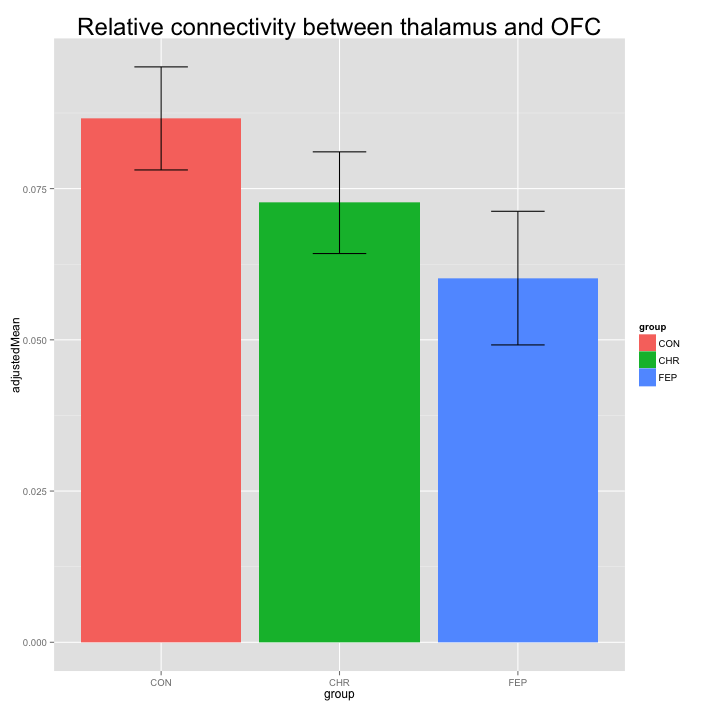

PC


Mapping a variable to y and also using stat="bin".
  With stat="bin", it will attempt to set the y value to the count of cases in each group.
  This can result in unexpected behavior and will not be allowed in a future version of ggplot2.
  If you want y to represent counts of cases, use stat="bin" and don't map a variable to y.
  If you want y to represent values in the data, use stat="identity".
  See ?geom_bar for examples. (Deprecated; last used in version 0.9.2)


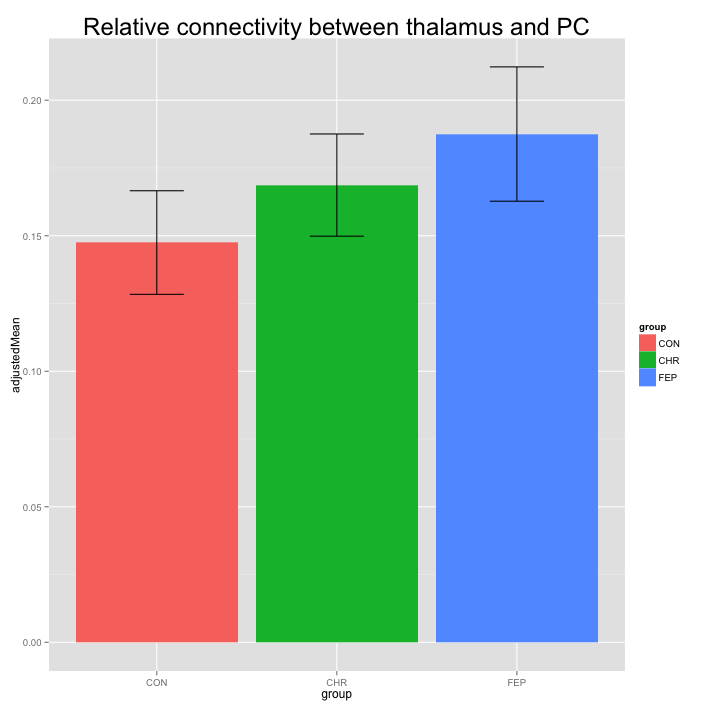

In [9]:
for CORTEX in ['OFC','PC']:
    print CORTEX
    df = allData[allData.cortex==CORTEX]
    ggtitle = "Relative connectivity between thalamus and {0}".format(CORTEX)
    %R -i df
    %R -i ggtitle
    %R df <- as.data.frame(df)
    %R library(ggplot2)
    %R groups=c("CHR","CON","FEP")

    #Anova
    %R anovaOutput <- aov(relativeConnectivity ~ group, data=df)

    #Adjusted means
    %R adjustedMeans <- effect("group", anovaOutput, se=TRUE)

    #Adjusted mean and confidence intervals calculation
    %R adjustedMean=c(adjustedMeans$fit[1],adjustedMeans$fit[2],adjustedMeans$fit[3])
    %R adjustedMeanLCI=c(adjustedMeans$lower[1],adjustedMeans$lower[2],adjustedMeans$lower[3])
    %R adjustedMeanUCI=c(adjustedMeans$upper[1],adjustedMeans$upper[2],adjustedMeans$upper[3])

    #Dataframe for graph
    %R forGraph=data.frame(adjustedMean,adjustedMeanLCI,adjustedMeanUCI,group=groups)

    #Order groups
    %R forGraph$group <- factor(forGraph$group, levels=c("CON","CHR","FEP"), ordered=TRUE)

    #ggplot
    %R p <- ggplot(forGraph, aes(group,adjustedMean,fill=group))
    %R p <- p + geom_bar(position="dodge")
    %R p <- p + geom_errorbar(aes(ymin=adjustedMeanLCI, ymax=adjustedMeanUCI, fill=group), width=0.3, position=position_dodge(width=0.9))
    %R p <- p + labs(title=ggtitle)
    %R p <- p + theme(plot.title = element_text(size=rel(2)))

    #Print graph
    %R -w 25 -h 25 -u cm print(p)
    

#Correlation with CHR, FEP clinical values:
Thalamus와

- OFC
- PC
사이의 relative connectivity와 clinical value사이의 correlation 

CHR relativeConnectivity OFC in correlation with G8
p-value : 0.0268090353025
correlation coefficient : -0.359123526124


/Users/admin/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2021: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


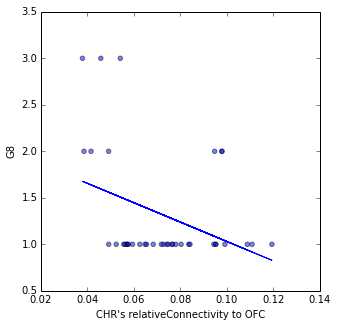





CHR relativeConnectivity OFC in correlation with SAPS_rhldlgksgodehd0
p-value : 0.0285929724572
correlation coefficient : -0.35530310546


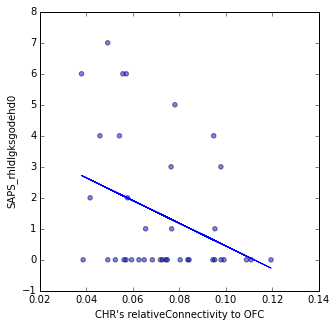





CHR relativeConnectivity OFC in correlation with SOFASpresent0
p-value : 0.0465875688644
correlation coefficient : 0.324862041187


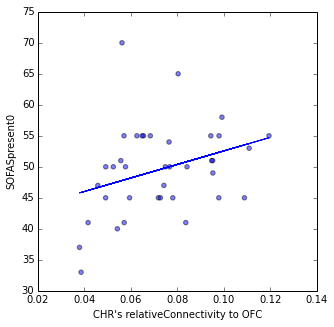





CHR relativeConnectivity PC in correlation with G4
p-value : 0.0309668433251
correlation coefficient : 0.350513039911


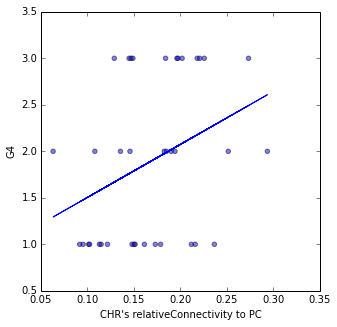





FEP relativeConnectivity OFC in correlation with G7
p-value : 0.0477604874258
correlation coefficient : 0.426517214224


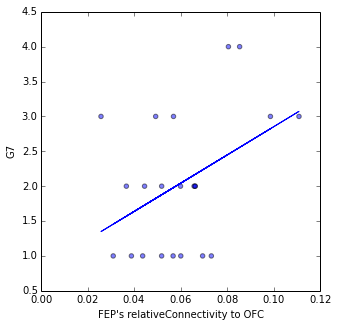





FEP relativeConnectivity OFC in correlation with G8
p-value : 0.0390743839603
correlation coefficient : -0.442728799083


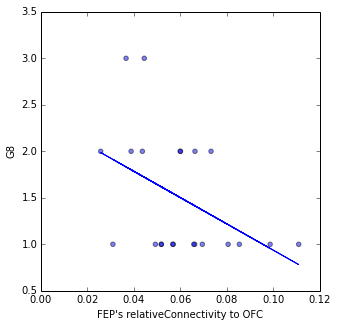





FEP relativeConnectivity OFC in correlation with GAFpastyr0
p-value : 0.00605567189523
correlation coefficient : 0.565826857804


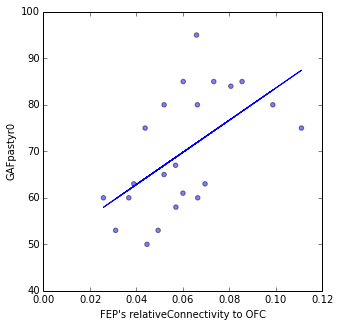





FEP relativeConnectivity PC in correlation with YMS
p-value : 0.000438343639127
correlation coefficient : 0.684780481852


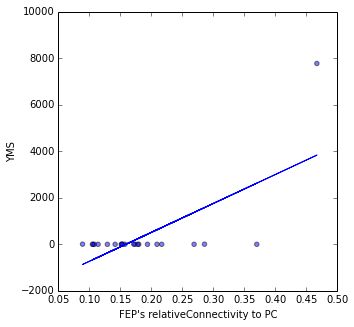

In [10]:
thingsToCheck='relativeConnectivity'
for GROUP in ['CHR','FEP']:
    for CORTEX in ['OFC','PC']:
        df = allData[allData.group==GROUP][allData.cortex==CORTEX]
        for COLUMN in df.columns[15:]:
            coeff,pVal=scipy.stats.pearsonr(df[thingsToCheck],df[COLUMN])
            if pVal < 0.05:
                print '{GROUP} {thingsToCheck} {CORTEX} in correlation with {COLUMN}'.format(
                                                                          GROUP=GROUP,
                                                                          thingsToCheck=thingsToCheck,
                                                                          CORTEX=CORTEX,
                                                                          COLUMN=COLUMN
                                                                          )
                print '================================================================='
                print 'p-value : {0}\ncorrelation coefficient : {1}'.format(pVal,coeff)
            
                plt.figure(figsize=(5,5))
                plt.scatter(df[thingsToCheck],df[COLUMN],alpha=.5)

                data = pd.DataFrame({'x':df[thingsToCheck], 'y':df[COLUMN]})
                model = ols("y ~ x",data).fit()
                offset, coef = model._results.params

                plt.plot(df[thingsToCheck], df[thingsToCheck]*coef + offset)
                plt.xlabel('{GROUP}\'s {thingsToCheck} to {CORTEX}'.format(
                                                                          GROUP=GROUP,
                                                                          thingsToCheck=thingsToCheck,
                                                                          CORTEX=CORTEX)                                                                          )
                plt.ylabel(COLUMN)
                plt.show()
                print '\n\n\n'
            

#Correlation with CHR, FEP clinical values together:

OFC
	G8
	p-value : 0.00113899270425
	correlation coefficient : -0.410043975593


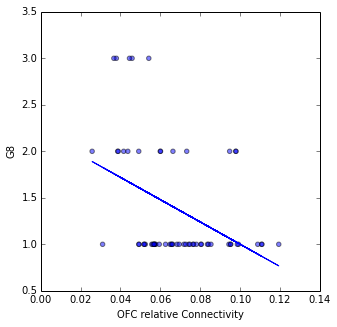





	G12
	p-value : 0.0203610974986
	correlation coefficient : -0.298869430737


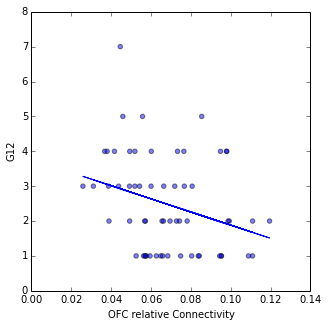





PC
	G2
	p-value : 0.0451011964582
	correlation coefficient : 0.259684129005


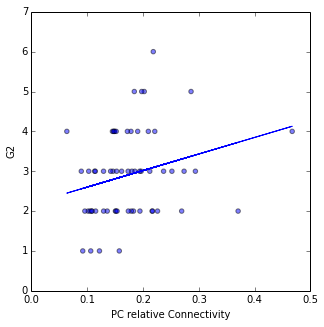





	G14
	p-value : 0.0214897687647
	correlation coefficient : 0.296365711105


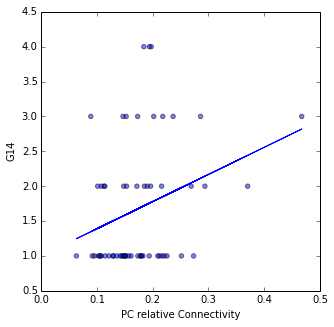





	YMS
	p-value : 4.81556825678e-06
	correlation coefficient : 0.552070918365


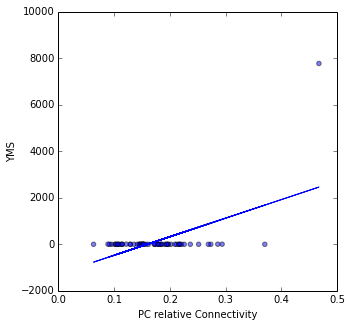

In [11]:
thingsToCheck='relativeConnectivity'
for CORTEX in ['OFC','PC']:
    print CORTEX
    df = allData[allData.group!='CON'][allData.cortex==CORTEX]
    for COLUMN in df.columns[15:]:
        coeff,pVal=scipy.stats.pearsonr(df[thingsToCheck],df[COLUMN])
        if pVal < 0.05:
            print '\t',COLUMN
            print '\t ============='
            print '\tp-value : {0}\n\tcorrelation coefficient : {1}'.format(pVal,coeff)
            plt.figure(figsize=(5,5))
            plt.scatter(df[thingsToCheck],df[COLUMN],alpha=.5)


            data = pd.DataFrame({'x':df[thingsToCheck], 'y':df[COLUMN]})
            model = ols("y ~ x",data).fit()
            offset, coef = model._results.params

            plt.plot(df[thingsToCheck], df[thingsToCheck]*coef + offset)
            plt.xlabel('{0} relative Connectivity'.format(CORTEX))
            plt.ylabel(COLUMN)
            plt.show()
            print '\n\n\n'

            

#Partial correlation with CHR, FEP clinical values:
Thalamus와

- OFC
- PC
사이의 relative connectivity와 clinical value사이의 partial correlation 

(intracranial volume의 effect를 빼냄)

In [12]:
variableToCompare = 'relativeConnectivity'
for GROUP in ['CHR','FEP']:
    for COLUMN in df.columns[15:]:
        df = allData[allData.group==GROUP][allData.cortex=='OFC']
        %R -i COLUMN
        %R -i variableToCompare
        %R -i df
        %R -o pcorOut pcorOut <- pcor.test(df[variableToCompare],df[COLUMN],df['intracranialVolume'])
    
        if pcorOut[1] < 0.05:
            print 'Partial correlation between \n{0} {1} & {2}'.format(GROUP,COLUMN,variableToCompare)
            print '============================================'
            %R print(pcorOut)
            print '\n\n\n'

Partial correlation between 
CHR G8 & relativeConnectivity


    estimate    p.value statistic  n gp  Method
1 -0.3789843 0.01539982 -2.422837 38  1 pearson






Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: s

    estimate  p.value statistic  n gp  Method
1 -0.3503853 0.026883 -2.213212 38  1 pearson






Partial correlation between 
CHR SAPS_rhldlgksgodehd0 & relativeConnectivity


    estimate    p.value statistic  n gp  Method
1 -0.3592589 0.02275926 -2.277452 38  1 pearson






Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Partial correlation between 
CHR GAFpastyr0 & relativeConnectivity


   estimate    p.value statistic  n gp  Method
1 0.3259827 0.04135316  2.039972 38  1 pearson






Partial correlation between 
CHR SOFASpresent0 & relativeConnectivity


   estimate    p.value statistic  n gp  Method
1 0.3990823 0.01002571  2.574941 38  1 pearson






Partial correlation between 
CHR SOFASpastyr0 & relativeConnectivity


   estimate    p.value statistic  n gp  Method
1 0.3432135 0.03063428  2.161791 38  1 pearson






Partial correlation between 
FEP G8 & relativeConnectivity


    estimate    p.value statistic  n gp  Method
1 -0.4226273 0.04208882 -2.032641 22  1 pearson






Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: s

   estimate      p.value statistic  n gp  Method
1 0.6221346 0.0005326609   3.46377 22  1 pearson


#Partial correlation with CHR, FEP clinical values together

In [16]:
variableToCompare = 'relativeConnectivity'
for COLUMN in df.columns[15:]:
    df = allData[allData.group!='CON'][allData.cortex==CORTEX]
    %R -i COLUMN
    %R -i variableToCompare
    %R -i df
    %R -o pcorOut pcorOut <- pcor.test(df[variableToCompare],df[COLUMN],df['intracranialVolume'])
    
    if pcorOut[1] < 0.05:
        print 'Partial correlation between \n{0} & {1}'.format(COLUMN,variableToCompare)
        print '============================================'
        %R print(pcorOut)
        print '\n\n\n'

Partial correlation between 
P5 & relativeConnectivity


   estimate    p.value statistic  n gp  Method
1 0.2789718 0.02828829  2.193265 60  1 pearson






Partial correlation between 
N1 & relativeConnectivity


   estimate    p.value statistic  n gp  Method
1 0.3210261 0.01049289  2.559148 60  1 pearson






Partial correlation between 
N4 & relativeConnectivity


   estimate    p.value statistic  n gp  Method
1 0.2590152 0.04290691  2.024615 60  1 pearson






Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: system is exactly singular: U[2,2] = 0
Error in solve.default(cvx) : 
  Lapack routine dgesv: s

    estimate     p.value statistic  n gp  Method
1 -0.3474536 0.005149813  -2.79751 60  1 pearson


##2. Total connectivity

thalamus로 부터 나오는 연결성의 개인차를 계산해주지 않은 값으로, 논문에는 이전 다른 논문들에서 그랬던 것 처럼 relative connectivity로 진행할 것 이지만, absolute value가 가지는 중요성도 있기 때문에 그룹비교 하여보았습니다.


Thalamus와

- occipital cortex

- orbitofrontal cortex

- sensorimotor cortex

사이의 연결성이 그룹간 차이를 보입니다.


In [14]:
for CORTEX in allData.cortex.unique():
    TC = allData[allData.cortex==CORTEX].totalConnectivity
    GROUP = allData[allData.cortex==CORTEX].group
    IC = allData[allData.cortex==CORTEX].intracranialVolume

    formula = 'TC ~ GROUP + IC'
    lm = ols(formula, allData[allData.cortex==CORTEX]).fit()
    output=anova_lm(lm)
    
    if output.ix['GROUP','PR(>F)'] < 0.05:
        print '{} \t\t TC~GROUP+IC'.format(CORTEX)
        print '========='
        print output
        print '\n\n\n'


OCC 		 TC~GROUP+IC
          df        sum_sq       mean_sq         F    PR(>F)
GROUP      2  9.293172e+11  4.646586e+11  4.334919  0.015850
IC         1  1.398365e+11  1.398365e+11  1.304570  0.256312
Residual  93  9.968640e+12  1.071897e+11       NaN       NaN




OFC 		 TC~GROUP+IC
          df        sum_sq       mean_sq         F    PR(>F)
GROUP      2  4.712250e+12  2.356125e+12  6.286499  0.002749
IC         1  9.307692e+10  9.307692e+10  0.248343  0.619421
Residual  93  3.485559e+13  3.747913e+11       NaN       NaN




SMC 		 TC~GROUP+IC
          df        sum_sq       mean_sq         F    PR(>F)
GROUP      2  1.147244e+13  5.736222e+12  3.461914  0.035469
IC         1  1.267809e+13  1.267809e+13  7.651459  0.006843
Residual  93  1.540965e+14  1.656951e+12       NaN       NaN




